# Investigating Differences Between Schools With Different Male to Female Ratios

Author: Qi Wang

In this notebook we will compare the different polarity trends between schools of different male to female ratios.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in College Data CSV
college_data = pd.read_csv('college-records.csv')

In [3]:
college_data.head()

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type,...,2015,2016,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Jesuit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Peforming Linear Regression

Here, we will use the Linear Regression model from sci-kit learn to give us the slope of the polarity across years.

In [4]:
# Initialize Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [5]:
slopes = []

for _, row in college_data.iterrows():
    y = []
    for year in range(2013, 2023):
        if (not pd.isna(row[str(year)])):
            y.append(row[str(year)])
            
    if len(y) == 0:
        slopes.append(np.nan)
        continue
    
    X = np.arange(1, len(y) + 1, 1).reshape(-1,1)
    Y = np.array(y)

    model.fit(X, Y)
#     print(model.coef_)
    slopes.append(model.coef_[0])

college_data['slopes'] = slopes

In [6]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type,...,2016,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,slopes
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Jesuit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-5.392547,-7.123969,-3.919732,-2.692837,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,0.074160
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,NaN,-0.075550,NaN,NaN,0.761180,0.151384,0.425327,NaN,NaN,0.089283
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-5.927530,-8.535499,-8.483771,-5.880843,-7.086419,-6.771482,NaN,-0.570280,1144.353493,-0.524290
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will create a new column with fractional values for the Male to Female ratios

In [14]:
ratios = []

for _, row in college_data.iterrows():
    if row['Male : Female (ratio)'] == 'male2female':
        ratios.append(0)
        continue
    rat = row['Male : Female (ratio)'].split(' : ')
    
    ratios.append(int(rat[0]) / int(rat[1]))
    
college_data['Gender Ratio'] = ratios

In [15]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type,...,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,slopes,Gender Ratio
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.960784
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.851852
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Jesuit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.127660
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857143
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-7.123969,-3.919732,-2.692837,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,0.074160,0.851852
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818182
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,-0.075550,NaN,NaN,0.761180,0.151384,0.425327,NaN,NaN,0.089283,1.000000
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-8.535499,-8.483771,-5.880843,-7.086419,-6.771482,NaN,-0.570280,1144.353493,-0.524290,0.818182
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.785714


## Plotting
We will plot the avaliable polarities with the different gender ratios

In [16]:
import matplotlib.pyplot as plt

In [17]:
x = []
y = []

for _, row in college_data.iterrows():
    if not pd.isna(row['slopes']):
        x.append(float(row['Gender Ratio']))
        y.append(float(row['slopes']))
    
x = np.array(x)
y = np.array(y)

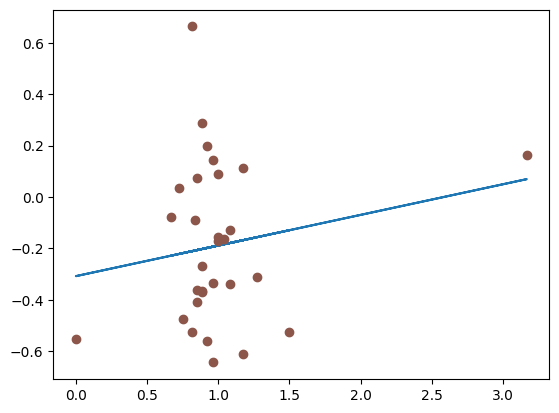

In [18]:
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.plot(x, y, 'o', color='tab:brown')

Let's remove the outlier

In [22]:
x = []
y = []

for _, row in college_data.iterrows():
    if not pd.isna(row['slopes']) and row['Gender Ratio'] < 2 and row['Gender Ratio'] > 0:
        x.append(float(row['Gender Ratio']))
        y.append(float(row['slopes']))
    
x = np.array(x)
y = np.array(y)

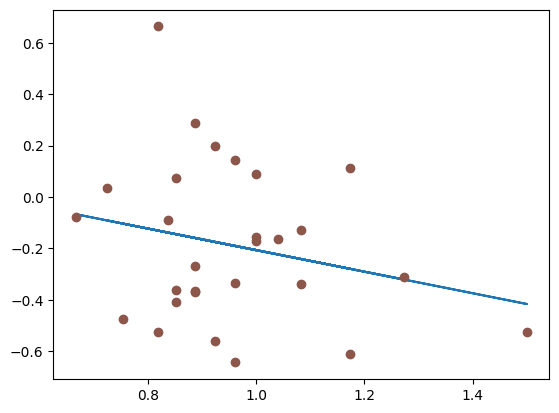

In [23]:
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.plot(x, y, 'o', color='tab:brown')

# R Graphs

Using `plotnine` package

In [21]:
from plotnine import *
%matplotlib inline

In [29]:
df = pd.DataFrame({
    'Male_Female': x,
    'Bipartisan Slope':y
})
df

,Male_Female,Bipartisan Slope
0,0.851852,0.074160
1,1.000000,0.089283
2,0.818182,-0.524290
3,1.000000,-0.171053
4,0.960784,-0.335393
5,1.000000,-0.156909
6,1.040816,-0.164242
7,1.173913,0.112422
8,0.886792,-0.370359
9,0.851852,-0.363791


In [43]:
plot = (ggplot(df, aes('Male_Female', 'Bipartisan Slope'))
 + geom_point(color = 'royalblue')
 + xlab("Male Female Ratio")
 + ggtitle("Male Female Ratio vs Bipartisan Slope")
 + stat_smooth(method='lm', color='indianred'))

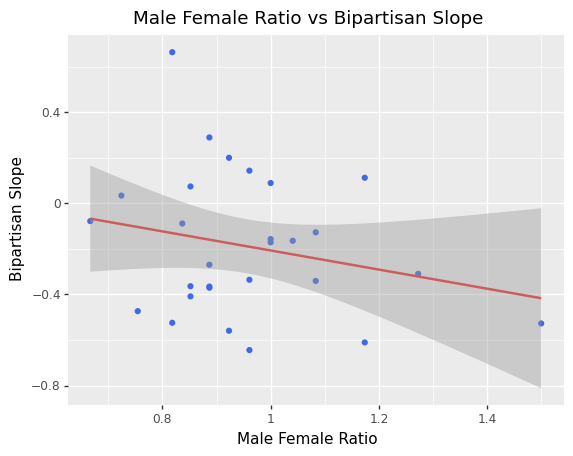

<ggplot: (8740330770300)>

In [44]:
plot

In [45]:
plot.save(filename = 'ratoi.png', dpi=1000)

/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ratoi.png


# Statistical Test
Now we will conduct a Linear Regression T-Test to see if there is a linear relationship between the gender ratio and the polarity trend across years.

H0: β=0

Ha: β≠0

α = 0.05

In [24]:
import statsmodels.api as sm

In [25]:
model = sm.OLS(y, x).fit()

In [26]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              12.06
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                     0.00175
Time:                        22:28:49   Log-Likelihood:                         -5.7157
No. Observations:                  28   AIC:                                      13.43
Df Residuals:                      27   BIC:                                      14.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

With a P-value of 0.006, there is evidence of a linear relationship between the gender ratios and polarity slopes